# Car Price Prediction

## Постановка задачи

Датасет, с которым предстоит работать содержит различные данные о автомобилях из которых строится его цена.

Нужно провести анализ данных, предобработку, обучить несколько моделей и провести сравнение результатов обучения на основе прогнозов цены автомобилей.  

### Подключение модулей

Для работы и визуализации данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Модели

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor

Для подготовки данных для обучения

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Метрики

In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Загрузка данных

Работа будет проводиться с датасетом cardata

In [5]:
df = pd.read_csv('cardata.csv')

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Посмотрим на информацию о датасете

In [7]:
df.shape

(301, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Размерность датасета: 301 запись и 9 признаков  
3 признака типа int64  
2 признака типа float64  
4 признака типа object  
Пропусков не наблюдается

Выведем описательную статистику, включая все признаки датасета

In [9]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


В среднем, в датасете находятся машины на бензине с механической коробкой передач 2013 года выпуска    
с ценой продажи 4.66, которые успели пройти ~37 000 км и были проданы диллером. Также средняя цена таких автомобилей сейчас - 7.63
  
Большая часть автомобилей до продажи не имела владельцев.  
  
На первый взгялд, выбросы могут встречаться в столбцах Selling_Price и Present_Price.  

### Описание данных  
Признаки:  
  
- Car_Name – наименование машины  
- Year – год выпуска  
- Selling_Price – продажная цена  
- Present_Price – текущая цена  
- Kms_Driven – сколько киллометров было пройденно  
- Fuel_Type – тип топлива  
- Seller_Type – тип продавца  
- Transmission – коробка передач  
- Owner – сколько было владельцев  
  
Целевой признак:  
- Selling_Price

### Предварительная обработка данных

Удаляем ненужный столбец Car_Nmae

In [10]:
df.drop('Car_Name', axis=1, inplace=True)

Дабы было легче воспринимать информацию о возрасте машины, создадим новый столбец, где укажем, сколько лет машине

In [11]:
df['Age']=(df['Year'].max()+1)-df['Year']

Так как теперь у нас есть столбец Age, удаляем столбец Year

In [12]:
df.drop('Year', axis=1, inplace=True)

In [13]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,5


Убедимся в том, что пропущенный значений точно нет

In [14]:
df.isna().sum()

Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Age              0
dtype: int64

Пропущенных значений нет

Посмотрим, есть ли дубликаты

In [15]:
df.duplicated().sum()

2

Имеется 2 дубликата  
Выведем их

In [16]:
df[df.duplicated()]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
17,7.75,10.79,43000,Diesel,Dealer,Manual,0,3
93,23.00,30.61,40000,Diesel,Dealer,Automatic,0,4


In [17]:
df[df.duplicated(keep='last')]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
15,7.75,10.79,43000,Diesel,Dealer,Manual,0,3
51,23.00,30.61,40000,Diesel,Dealer,Automatic,0,4


Удалим дубликаты из датасета

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(299, 8)

Дубликаты успешно удалены

### Разведочный анализ данных (EDA)

Разделим датасет на 2 разных: первый будет включать все признаки типа object, а второй все признаки типа float64 и int64

In [20]:
df_cat = df.select_dtypes(['object'])
df_num = df.select_dtypes(['int64','float64'])

Сначала проанализируем первый датасет

In [21]:
df_cat

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


Для всех столбцов построим countplot, чтобы посмотреть какие значения встречаются и в каком количестве  
Также посмотрим на описательную статистику датасета  

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64


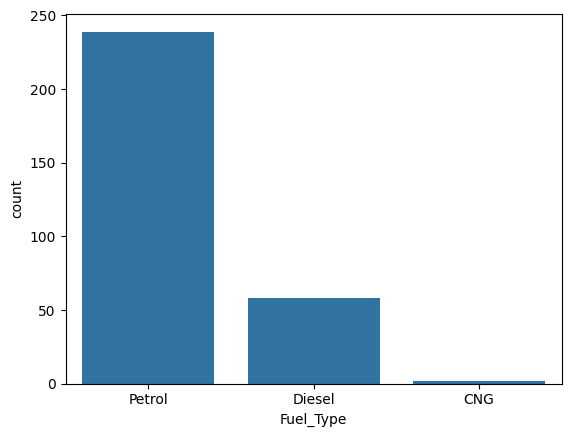

Seller_Type
Dealer        193
Individual    106
Name: count, dtype: int64


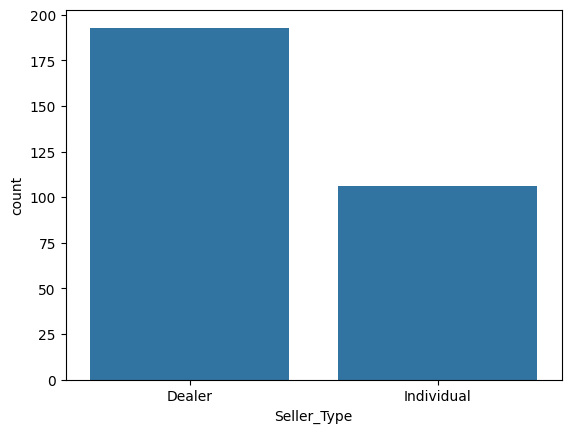

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64


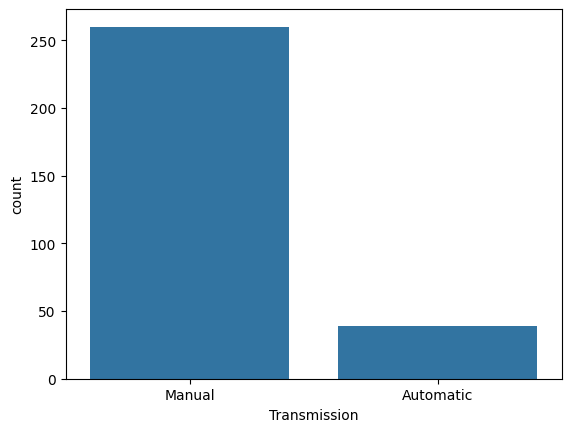

In [22]:
for cat in df_cat:
    print(df[cat].value_counts())
    sns.countplot(x=cat, data=df)
    plt.show()

In [23]:
df_cat.describe()

,Fuel_Type,Seller_Type,Transmission
count,299,299,299
unique,3,2,2
top,Petrol,Dealer,Manual
freq,239,193,260


Можно заметить, что большинство машин потребляет бензин, а меньше всего, всего 2 автомобиля - сжатый метан.    
Чаще всего машины продают оффициальные диллеры, реже - частные лица.  
Очень много машин с механической коробкой передач.

Дальше проанализируем второй датасет

In [24]:
df_num.describe()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.589632,7.541037,36916.752508,0.043478,5.384615
std,4.984240,8.567887,39015.170352,0.248720,2.896868
min,0.100000,0.320000,500.000000,0.000000,1.000000
25%,0.850000,1.200000,15000.000000,0.000000,3.000000
50%,3.510000,6.100000,32000.000000,0.000000,5.000000
75%,6.000000,9.840000,48883.500000,0.000000,7.000000
max,35.000000,92.600000,500000.000000,3.000000,16.000000


Как уже ранее говорилось в среднем, в датасете находятся машины возрастом в 5 лет  
с ценой продажи 4.59, которые успели пройти ~37 000 км и которые сейчас стоят 7.54

Взглянем на нормальность распределения числовых признаков

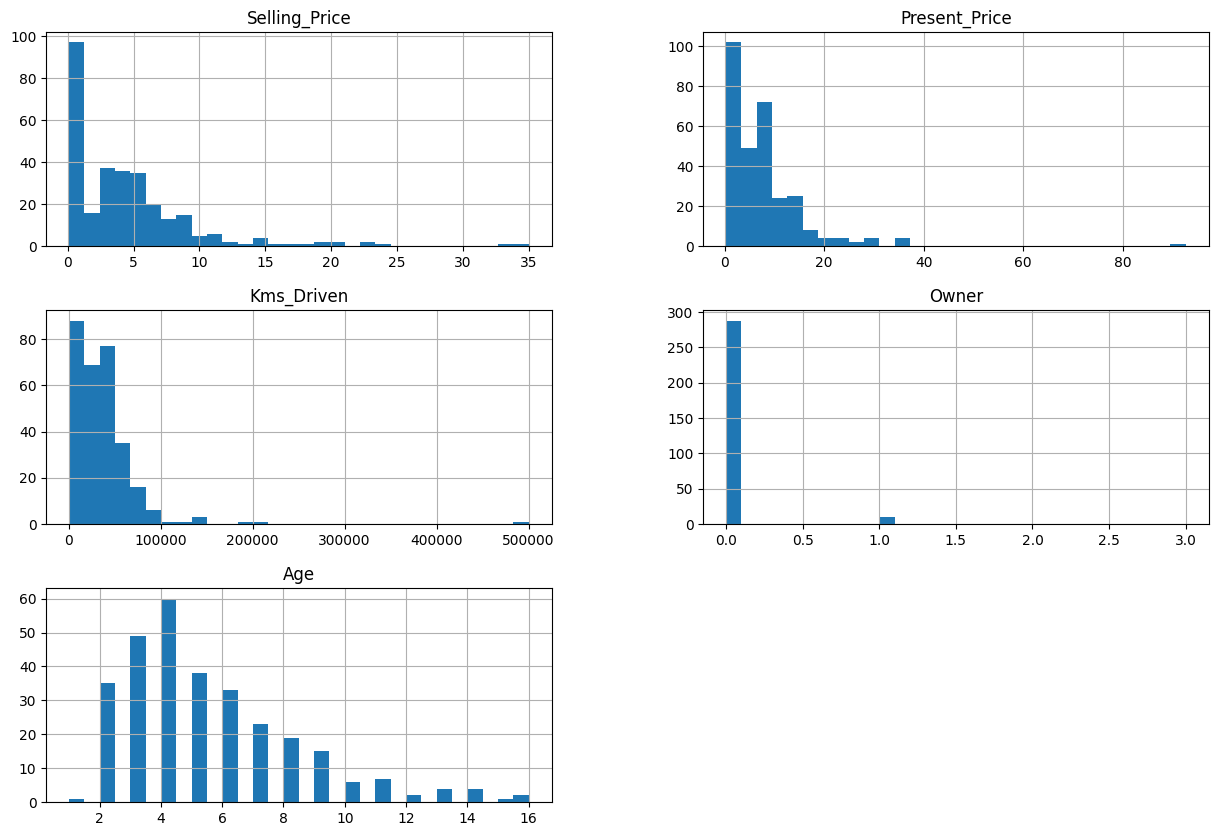

In [25]:
df.hist(figsize = (15,10), bins = 30);

Признаки не имеют нормального распределения  
Также можно заметить, что в признаке Kms_Driven есть маленькая доля значений на отметке в 500000  
Такое же можно и заметить и в признаке Present_Price, но на значении в 80, что, возможно, подтверждает наличие выбросов в датасете

Взглянем на корреляцию в датасете

<Figure size 800x600 with 0 Axes>

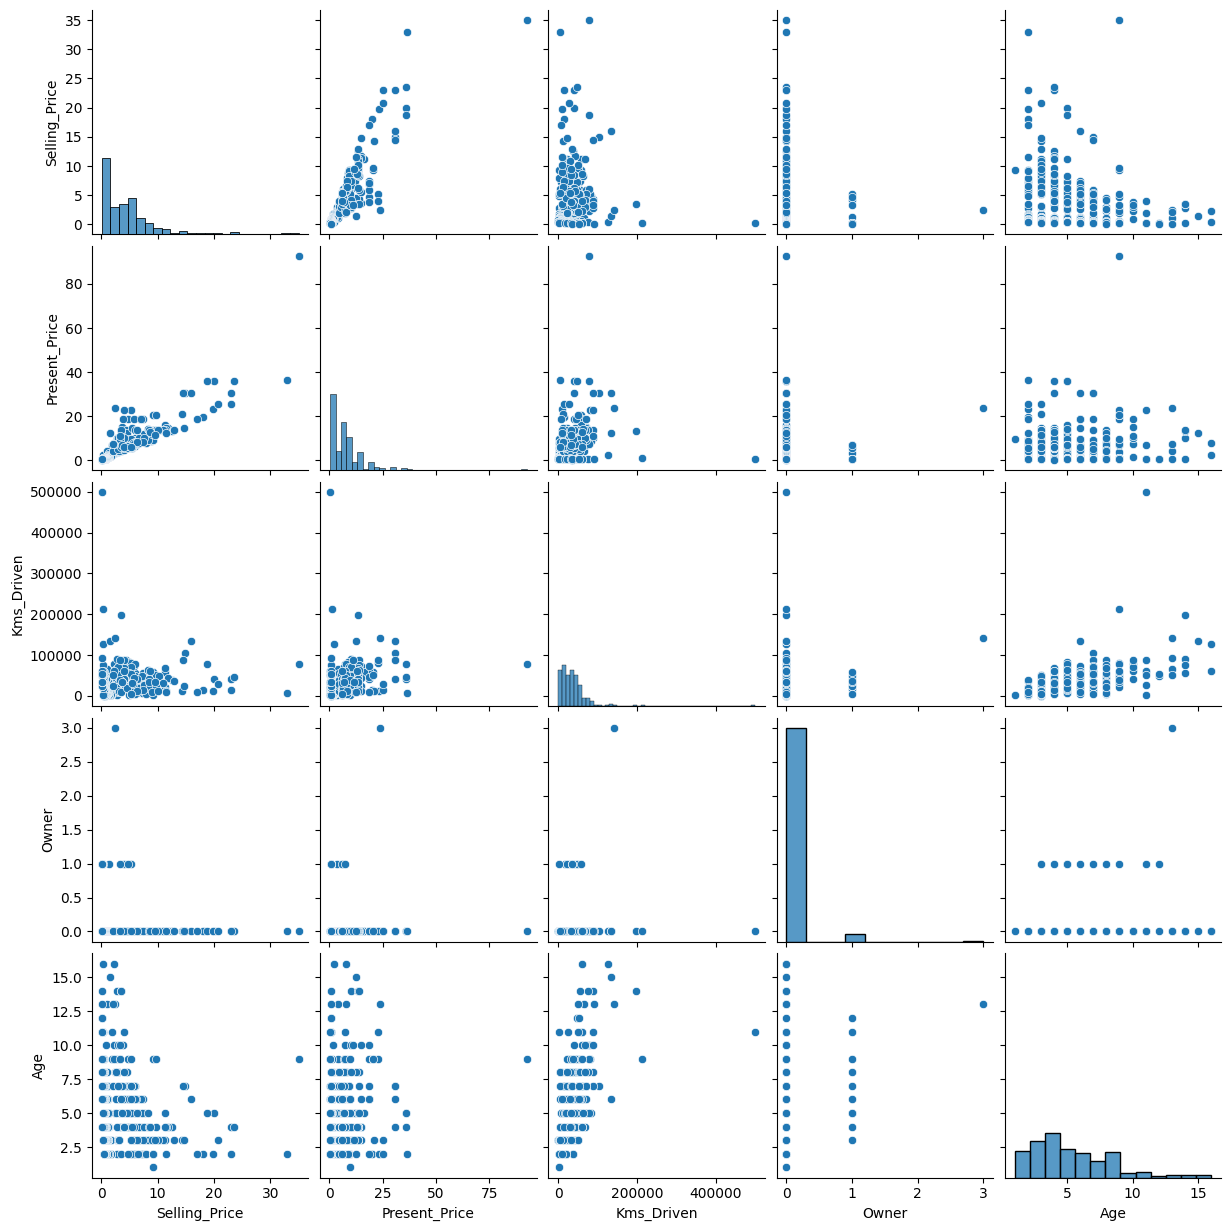

In [26]:
plt.figure(figsize=(8,6))
sns.pairplot(df)

<Axes: >

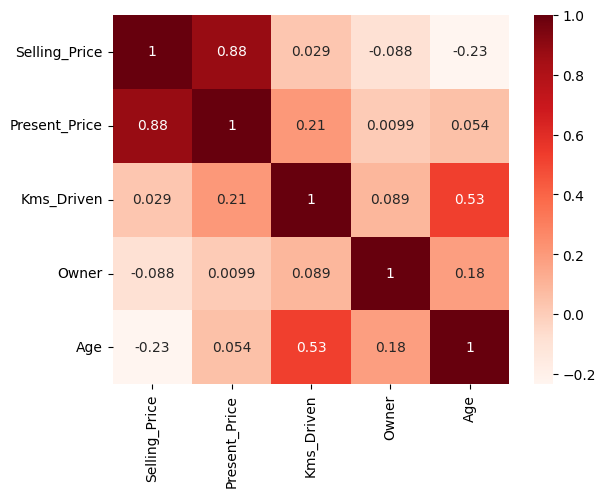

In [27]:
sns.heatmap(df_num.corr(), annot=True, cmap='Reds')

Есть сильная корреляция между ценой продажи и текущей ценой автомобиля, что довольно логично  
Также можно заметить ещё одну очевидную зависимость - между пройденными киллометрами и возрастом автомобиля

Теперь поработаем с выбросами  
Так как на графиках было видно, что в признаках Present_Price и Kms_Driven есть возможные выбросы, проверем именно их  
Выведем все машины, цена которых сейчас больше 40

In [28]:
(df[(df['Present_Price']>40)])

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
86,35.0,92.6,78000,Diesel,Dealer,Manual,0,9


Всего одна запись.  
Автомобиль продавался за 35, а сейчас его цена 92.6, а возраст 9 лет.  
Возможно это редкий автомобиль, но так как запись всего одна, её можно будет удалить.

Посмотрим на автомибили, пробег которых больше 250 000 км

In [29]:
(df[(df['Kms_Driven']>250000)])

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
196,0.17,0.52,500000,Petrol,Individual,Automatic,0,11


Снова всего одна запись.  
Как видно, пробег автомобиля - 500 000 км.  
Однако возраст 11 лет, так что такой пробег вполне возможен, но так как запись всего одна, её можно будет удалить.

Удаляем эти записи по индексу

In [30]:
df.drop(index=[85,194],inplace=True)
df = df.reset_index(drop=True)

In [31]:
df.shape

(297, 8)

Удаление прошло успешно

Посмотрим на то, как поменялась общая картина

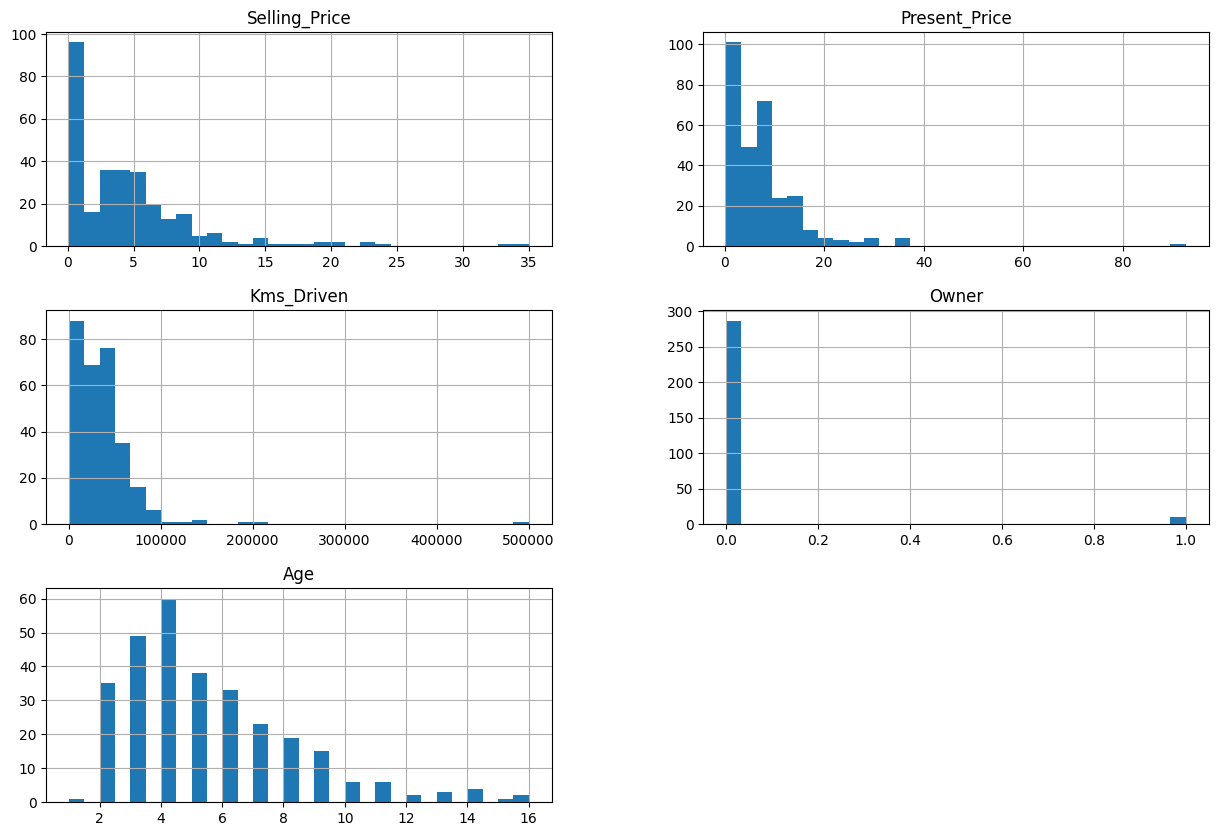

In [32]:
df.hist(figsize = (15,10), bins = 30);

В принципе, никак

Преобразуем бинарные признаки и Fuel_Type в числовые значения, чтобы посмотреть на корреляцию между всеми признаками

In [33]:
df1=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True, dtype=int)
df1

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,5,0,1,0,1
1,4.75,9.54,43000,0,6,1,0,0,1
2,7.25,9.85,6900,0,2,0,1,0,1
3,2.85,4.15,5200,0,8,0,1,0,1
4,4.60,6.87,42450,0,5,1,0,0,1
...,...,...,...,...,...,...,...,...,...
292,9.50,11.60,33988,0,3,1,0,0,1
293,4.00,5.90,60000,0,4,0,1,0,1
294,3.35,11.00,87934,0,10,0,1,0,1
295,11.50,12.50,9000,0,2,1,0,0,1


In [34]:
df1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.884382,0.033867,-0.098917,-0.229408,0.542701,-0.530741,-0.552212,-0.356042
Present_Price,0.884382,1.000000,0.192778,-0.091852,0.043046,0.470373,-0.462260,-0.523593,-0.322836
Kms_Driven,0.033867,0.192778,1.000000,-0.025560,0.515306,0.180708,-0.181127,-0.116985,-0.144385
Owner,-0.098917,-0.091852,-0.025560,1.000000,0.108758,-0.044868,0.047430,0.097761,0.071499
Age,-0.229408,0.043046,0.515306,0.108758,1.000000,-0.049858,0.045341,0.016433,0.017416
Fuel_Type_Diesel,0.542701,0.470373,0.180708,-0.044868,-0.049858,1.000000,-0.979070,-0.343815,-0.091008
Fuel_Type_Petrol,-0.530741,-0.462260,-0.181127,0.047430,0.045341,-0.979070,1.000000,0.351771,0.083431
Seller_Type_Individual,-0.552212,-0.523593,-0.116985,0.097761,0.016433,-0.343815,0.351771,1.000000,0.069867
Transmission_Manual,-0.356042,-0.322836,-0.144385,0.071499,0.017416,-0.091008,0.083431,0.069867,1.000000


<Axes: >

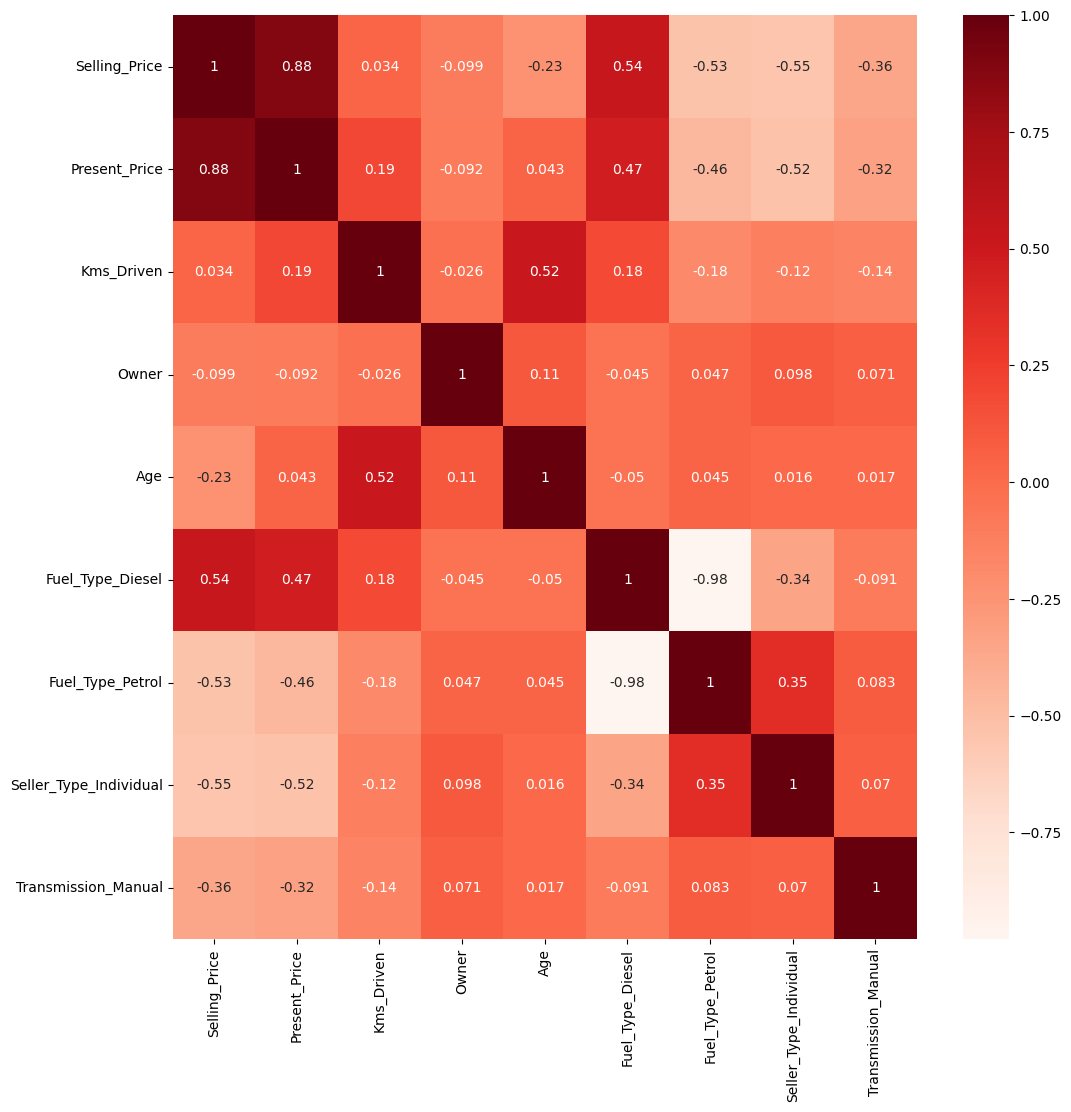

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(df1.corr(), annot=True, cmap='Reds')

Заметна корреляция между Fuel_Type_Diesel и Selling_Price с Present_Price

In [36]:
df1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,5,0,1,0,1
1,4.75,9.54,43000,0,6,1,0,0,1
2,7.25,9.85,6900,0,2,0,1,0,1
3,2.85,4.15,5200,0,8,0,1,0,1
4,4.60,6.87,42450,0,5,1,0,0,1


### Обучение моделей

Для начала нормализируем данные для более стабильного обучения

In [37]:
scaler = MinMaxScaler(feature_range=(1,4))
nrm = scaler.fit_transform(df1[['Present_Price', 'Kms_Driven','Age']])
nrm = pd.DataFrame(nrm, columns=['Present_Price', 'Kms_Driven','Age'])
nrm = pd.concat([nrm, df1[['Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual','Owner', 'Selling_Price']]], axis=1)
nrm

,Present_Price,Kms_Driven,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner,Selling_Price
0,1.171326,1.159159,1.8,0,1,0,1,0,3.35
1,1.299740,1.255255,2.0,1,0,0,1,0,4.75
2,1.309818,1.038438,1.2,0,1,0,1,0,7.25
3,1.124512,1.028228,2.4,0,1,0,1,0,2.85
4,1.212939,1.251952,1.8,1,0,0,1,0,4.60
...,...,...,...,...,...,...,...,...,...
292,1.366710,1.201129,1.4,1,0,0,1,0,9.50
293,1.181404,1.357357,1.6,0,1,0,1,0,4.00
294,1.347204,1.525129,2.8,0,1,0,1,0,3.35
295,1.395969,1.051051,1.2,1,0,0,1,0,11.50


Отделим целевеую переменную от остальных признаков, нужных для обучения

In [38]:
X = nrm.drop('Selling_Price',axis=1)
y = nrm['Selling_Price']

Разделим данные на тренировочные и тестовые

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y ,test_size=0.3, random_state=41)

### LinearRegression

Для начала попробуем взять модель LinearRegression

In [40]:
reg = LinearRegression()

Обучаем

In [41]:
reg.fit(X_train,Y_train)

LinearRegression()

Делаем предсказание

In [42]:
y_pred=reg.predict(X_test)

Выводим метрики, смотрим на то, как хорошо обучилась модель

In [43]:
print(f'MAE: {mean_absolute_error(y_pred, Y_test)}')
print(f'MSE: {mean_squared_error(y_pred, Y_test)}')
print(f'RMSE: {mean_squared_error(y_pred, Y_test)**(1/2)}')
print(f'R2 score: {r2_score(y_pred, Y_test)}')
r2LinearRegression = r2_score(y_pred, Y_test)

MAE: 1.1366109258123196
MSE: 3.7880851990845206
RMSE: 1.9463003876803089
R2 score: 0.8016091971699405


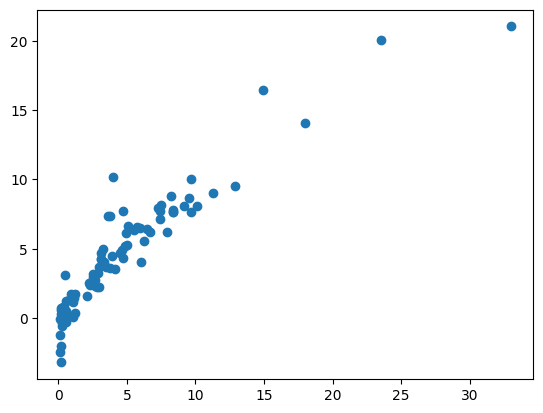

In [44]:
plt.scatter(Y_test,y_pred)

Модель обучилась неплохо

Посмотрим насколько хорошо модель обучена при помощи кросс-валидации

In [45]:
kf = KFold(10)
cross_val = cross_val_score(reg, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [46]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.88872858 0.74018751 0.92618571 0.82651367 0.81450468 0.8837383
 0.59922564 0.90484668 0.78367721 0.79069386]
Train CV mean : 0.816


In [47]:
kf = KFold(5)
cross_val = cross_val_score(reg, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [48]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.86968567 0.88567226 0.82555257 0.84949393 0.83528019]
Train CV mean : 0.853


Модель также показала себя неплохо

### DecisionTreeRegressor

Далее возьмём модель DecisionTreeRegressor

In [49]:
decision_tree_regressor = DecisionTreeRegressor()

Обучаем

In [50]:
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

Деалем предсказание

In [51]:
y_pred = decision_tree_regressor.predict(X_test)

Выводим метрики, смотрим на то, как хорошо обучилась модель

In [52]:
print(f'MAE: {mean_absolute_error(y_pred, Y_test)}')
print(f'MSE: {mean_squared_error(y_pred, Y_test)}')
print(f'RMSE: {mean_squared_error(y_pred, Y_test)**(1/2)}')
print(f'R2 score: {r2_score(y_pred, Y_test)}')
r2DecisionTreeRegressor = r2_score(y_pred, Y_test)

MAE: 0.6553333333333333
MSE: 1.9273733333333332
RMSE: 1.3882987190562892
R2 score: 0.9086657481097583


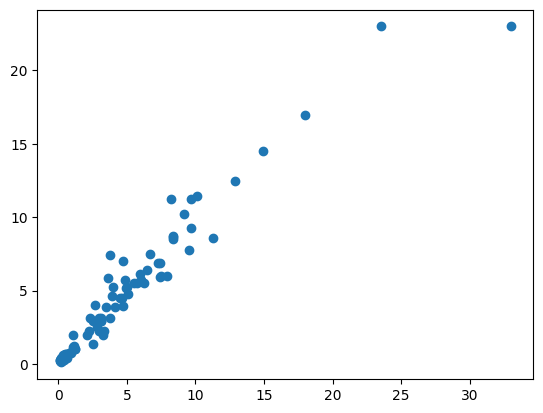

In [53]:
plt.scatter(Y_test,y_pred)

Данная модель обучилась уже чуть получше

Посмотрим насколько хорошо модель обучена при помощи кросс-валидации

In [54]:
kf = KFold(10)
cross_val = cross_val_score(decision_tree_regressor, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [55]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.95162065 0.72779584 0.91075136 0.97779976 0.84403007 0.85525224
 0.45896255 0.92534114 0.93296053 0.73655522]
Train CV mean : 0.832


In [56]:
kf = KFold(5)
cross_val = cross_val_score(decision_tree_regressor, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [57]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.91233218 0.9281318  0.86978753 0.722717   0.68152519]
Train CV mean : 0.823


И тут модель также показала хорошие результаты

### LASSO

Наконец, возьмём LASSO, так как интересно посмотреть, как он поведёт себя в данной задаче

In [58]:
lasso = LassoCV()

Обучаем

In [59]:
lasso.fit(X_train, Y_train)

LassoCV()

Делаем предсказание

In [60]:
y_pred = lasso.predict(X_test)

Выводим метрики, смотрим на то, как хорошо обучилась модель

In [61]:
print(f'MAE: {mean_absolute_error(y_pred, Y_test)}')
print(f'MSE: {mean_squared_error(y_pred, Y_test)}')
print(f'RMSE: {mean_squared_error(y_pred, Y_test)**(1/2)}')
print(f'R2 score: {r2_score(y_pred, Y_test)}')
r2LASSO = r2_score(y_pred, Y_test)

MAE: 1.1251927172392588
MSE: 4.27481282478598
RMSE: 2.0675620485939423
R2 score: 0.7361088584838648


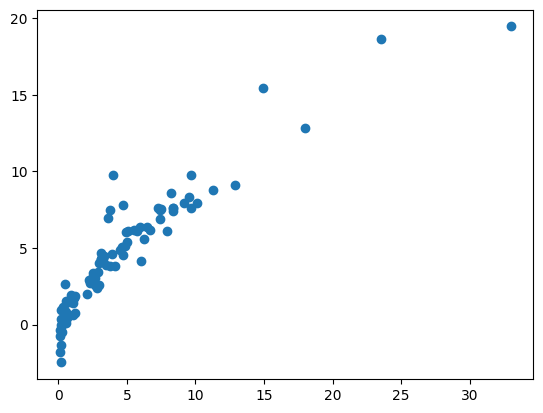

In [62]:
plt.scatter(Y_test,y_pred)

Пока что данная модель обучилась хуже предыдущих

Посмотрим, что даст кросс-валидация

In [63]:
kf = KFold(10)
cross_val = cross_val_score(lasso, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [64]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.85819048 0.7778496  0.92019336 0.84804536 0.78776441 0.87270138
 0.65333676 0.89869917 0.77438679 0.84528119]
Train CV mean : 0.824


In [65]:
kf = KFold(5)
cross_val = cross_val_score(lasso, X_train, Y_train, cv=kf, scoring='r2')
cv_mean = np.mean(cross_val)

In [66]:
print("Train CV scores :", cross_val)
print("Train CV mean :", round(cv_mean, 3))

Train CV scores : [0.85798704 0.86311521 0.80824833 0.86544089 0.86273154]
Train CV mean : 0.852


В большинстве случаях модель выдаёт хорошие результаты

### Сравнение

In [67]:
# Построим отдельный датафрейм, где будем хранить r2 score, чтобы потом их сравнить
regressors =["LinearRegression", "DecisionTreeRegressor", "LASSO"]

log_cols = ["Regressors", "R2_Score"]
log = pd.DataFrame(columns=log_cols)

# Заполняем таблицу
log["Regressors"] = regressors
log["R2_Score"] = [r2LinearRegression, r2DecisionTreeRegressor, r2LASSO]

# Выводим
log

,Regressors,R2_Score
0,LinearRegression,0.801609
1,DecisionTreeRegressor,0.908666
2,LASSO,0.736109


Теперь вывдеме график и сравним наши модели

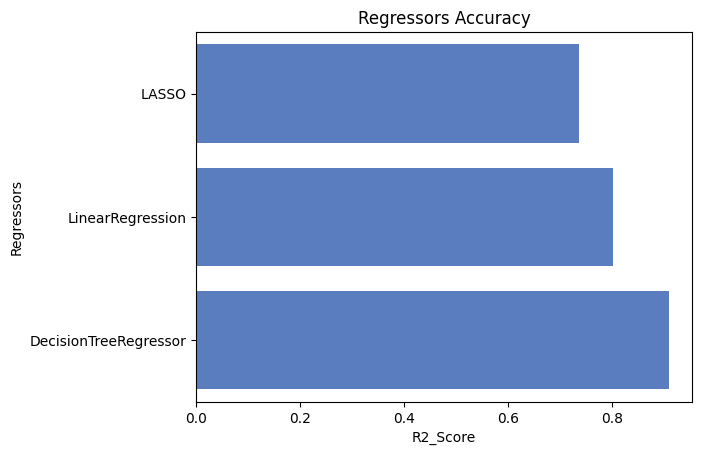

In [69]:
plt.xlabel('R2_Score')
plt.title('Regressors Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='R2_Score', y='Regressors', data=log.sort_values(by='R2_Score'), color="b");

В итоге можно построить следующий топ моделей:  
1. DecisionTreeRegressor  
2. LinearRegression  
3. LASSO
  
Самой лучшей моделью оказался DecisionTreeRegressor 

### Вывод

Провели разведочный анализ данных и предобработку данных:  
- пустых значений обнаруженно не было  
- было удалено 2 записи, которые являлись дубликатами  
- удалили записи, которые могли бы повлиять на обучние (запись с машиной, которая была дороже 40 и запись с машиной у которой был пробег 500 000)  
- у признаков не наблюдается нормальное распределенин
- есть несколько коррелирующих между собой признаков

Обучили 3 модели: LinearRegression, DecisionTreeRegressor и LASSO  
Провели сравнение моделей по R2 Score: лучшей моделью оказался DecisionTreeRegressor, а худшей - LASSO